# Bharat Ramchire

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic = pd.read_csv("titanic_train.csv")

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# some variables are not significant for the dependent variable so we drop these variables from dataset

In [9]:
titanic.drop(["Name","Cabin","Ticket","PassengerId"], axis = 1, inplace = True)

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
##age variable having null values so we do treatment for the age variable

In [16]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
titanic.Age.fillna(29.699118, inplace=True)

In [18]:
print(titanic['Age'].skew())

0.4344880777992063


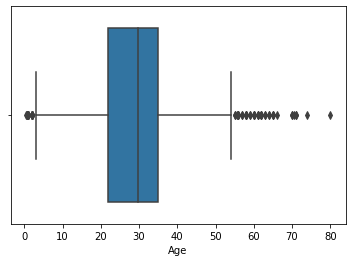

In [19]:
sns.boxplot(titanic['Age'])
plt.show()

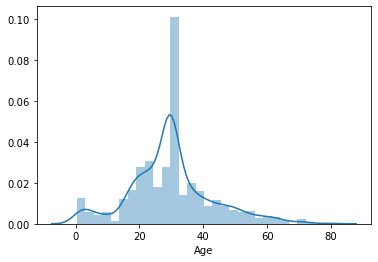

In [20]:
sns.distplot(titanic.Age)

0      1.000000
1      2.000000
2      3.000000
3      4.000000
4      6.000000
5      8.400000
6     10.000000
7     14.000000
8     15.000000
9     16.000000
10    16.000000
11    17.000000
12    18.000000
13    18.000000
14    18.000000
15    19.000000
16    19.000000
17    19.000000
18    20.000000
19    20.000000
20    21.000000
21    21.000000
22    22.000000
23    22.000000
24    22.000000
25    23.000000
26    23.000000
27    24.000000
28    24.000000
29    24.000000
30    24.000000
31    25.000000
32    25.000000
33    26.000000
34    26.000000
35    27.000000
36    27.000000
37    28.000000
38    28.000000
39    28.000000
40    29.000000
41    29.000000
42    29.000000
43    29.699118
44    29.699118
45    29.699118
46    29.699118
47    29.699118
48    29.699118
49    29.699118
50    29.699118
51    29.699118
52    29.699118
53    29.699118
54    29.699118
55    29.699118
56    29.699118
57    29.699118
58    29.699118
59    29.699118
60    29.699118
61    29.699118
62    29

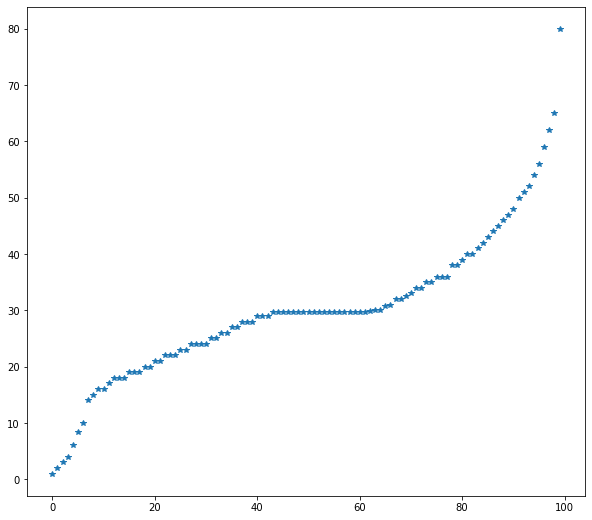

In [21]:
p=[ ]
for i in range(1,101):
    xyz = (titanic['Age'].quantile(i/100))
    p.append(xyz)
q=pd.Series(p)

pd.set_option("max_rows", None)
print(q)

plt.figure(figsize=(10,9))
plt.plot(p,'*')

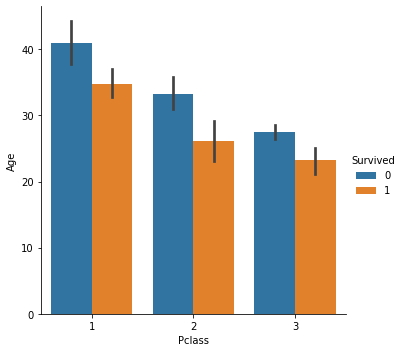

In [22]:
sns.catplot(x='Pclass', y='Age', hue='Survived' ,data= titanic, kind='bar')

In [23]:
# for emarked variable treatment for the null value

In [24]:
titanic['Embarked'] = np.where(titanic['Embarked'].isnull() == True , titanic['Embarked'].mode(), titanic['Embarked'])

In [25]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic.Pclass = titanic.Pclass.map({1: 'f', 2:'s', 3:'t'})

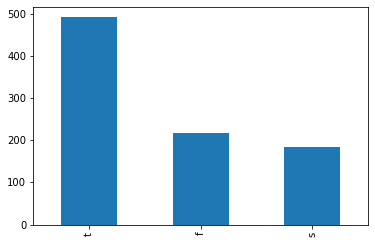

In [28]:
titanic.Pclass.value_counts().plot(kind='bar')

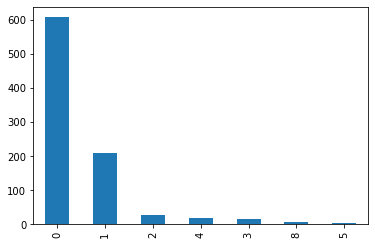

In [29]:
titanic.SibSp.value_counts().plot(kind='bar')

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
65    0.0
66    0.0
67    0.0
68    1.0
69    1.0
70    1.0
71    1.0
72    1.0
73    1.0
74    1.0
75    1.0
76    1.0
77    1.0
78    1.0
79    1.0
80    1.0
81    1.0
82    1.0
83    1.0
84    1.0
85    1.0
86    1.0
87    1.0
88    1.0
89    1.0
90    1.0
91    2.0
92    2.0
93    2.0
94    3.0
95    3.0
96    4.0
97    4.0
98    5.0
99    8.0


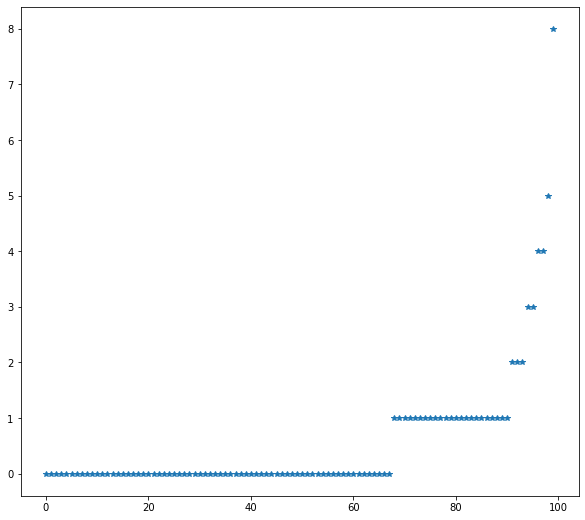

In [30]:
p=[ ]
for i in range(1,101):
    xyz = (titanic['SibSp'].quantile(i/100))
    p.append(xyz)
q=pd.Series(p)

pd.set_option("max_rows", None)
print(q)

plt.figure(figsize=(10,9))
plt.plot(p,'*')

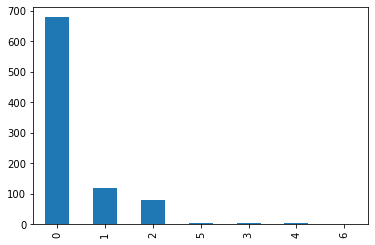

In [31]:
titanic.Parch.value_counts().plot(kind='bar')

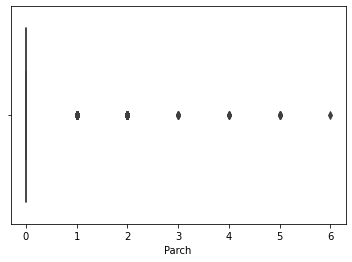

In [32]:
sns.boxplot(titanic['Parch'])
plt.show()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
65    0.0
66    0.0
67    0.0
68    0.0
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76    1.0
77    1.0
78    1.0
79    1.0
80    1.0
81    1.0
82    1.0
83    1.0
84    1.0
85    1.0
86    1.0
87    1.0
88    1.0
89    2.0
90    2.0
91    2.0
92    2.0
93    2.0
94    2.0
95    2.0
96    2.0
97    2.0
98    4.0
99    6.0


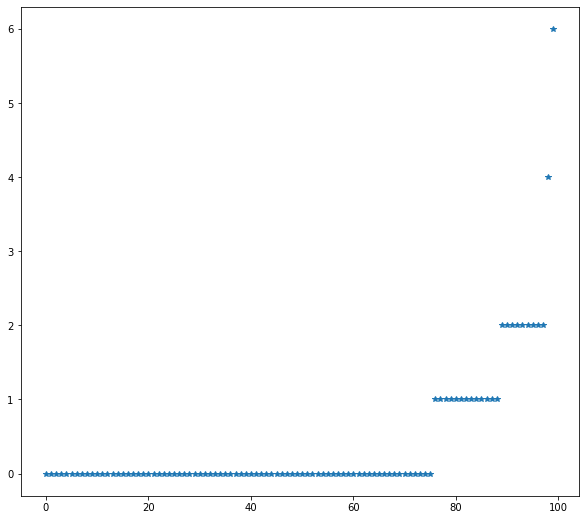

In [33]:
p=[ ]
for i in range(1,101):
    xyz = (titanic['Parch'].quantile(i/100))
    p.append(xyz)
q=pd.Series(p)

pd.set_option("max_rows", None)
print(q)

plt.figure(figsize=(10,9))
plt.plot(p,'*')

In [34]:
print(titanic['Fare'].skew())

4.787316519674893


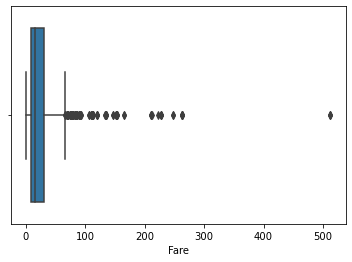

In [35]:
sns.boxplot(titanic.Fare)

0       0.00000
1       6.39750
2       6.97500
3       7.05252
4       7.22500
5       7.22500
6       7.22920
7       7.25000
8       7.25000
9       7.55000
10      7.72878
11      7.75000
12      7.75000
13      7.75000
14      7.75000
15      7.77500
16      7.77500
17      7.79580
18      7.85420
19      7.85420
20      7.89580
21      7.89580
22      7.89580
23      7.89580
24      7.91040
25      7.92500
26      7.95626
27      8.05000
28      8.05000
29      8.05000
30      8.05000
31      8.10000
32      8.61295
33      8.66250
34      9.00000
35      9.50000
36      9.58750
37     10.47000
38     10.50000
39     10.50000
40     11.13330
41     12.22000
42     12.51000
43     13.00000
44     13.00000
45     13.00000
46     13.00000
47     13.08334
48     14.01083
49     14.45420
50     14.50000
51     15.24580
52     15.50000
53     15.85000
54     16.10000
55     17.88000
56     19.25830
57     20.22000
58     21.00000
59     21.67920
60     23.22500
61     24.15000
62     2

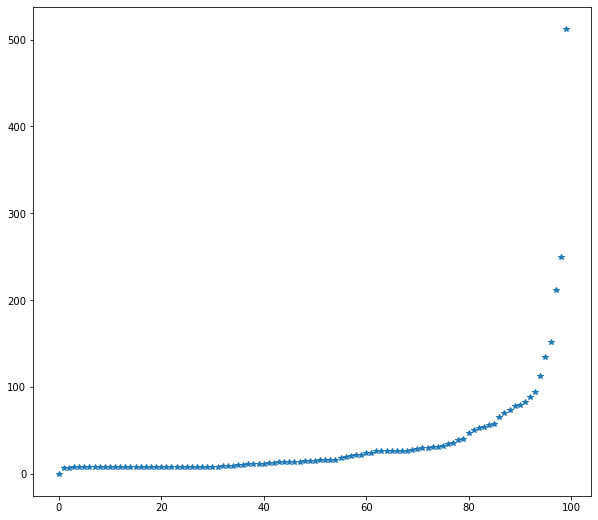

In [36]:
p=[ ]
for i in range(1,101):
    xyz = (titanic['Fare'].quantile(i/100))
    p.append(xyz)
q=pd.Series(p)

pd.set_option("max_rows", None)
print(q)

plt.figure(figsize=(10,9))
plt.plot(p,'*')

In [37]:
#fare variable has oulier so we treat for this

In [38]:
##treating outliers with other method
def set_caping(column, capping):
   
    mean = titanic[column].mean() # Mean of the column
    std = titanic[column].std() # Standard Deviation of the column
   
    UCL = mean + 3 * std
    LCL = mean - 3 * std
    if capping == "both":
        titanic[column] = np.where((titanic[column] > UCL), UCL , titanic[column])
        titanic[column] = np.where((titanic[column] < UCL), LCL , titanic[column])
       
    elif capping == "upper":
        titanic[column] = np.where((titanic[column] > UCL), UCL , titanic[column])
       
    elif capping == "lower":
        titanic[column] = np.where((titanic[column] < UCL), LCL ,titanic[column])
    else:
        print("Please enter proper value of capping parameter. \n Possible values:\tboth\tupper\tlower")

In [39]:
set_caping("Fare", capping = "upper")

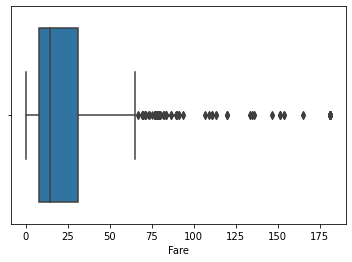

In [40]:
sns.boxplot(titanic.Fare)

In [41]:
print(titanic['Fare'].skew())

2.4654360651077605


0       0.000000
1       6.397500
2       6.975000
3       7.052520
4       7.225000
5       7.225000
6       7.229200
7       7.250000
8       7.250000
9       7.550000
10      7.728780
11      7.750000
12      7.750000
13      7.750000
14      7.750000
15      7.775000
16      7.775000
17      7.795800
18      7.854200
19      7.854200
20      7.895800
21      7.895800
22      7.895800
23      7.895800
24      7.910400
25      7.925000
26      7.956260
27      8.050000
28      8.050000
29      8.050000
30      8.050000
31      8.100000
32      8.612950
33      8.662500
34      9.000000
35      9.500000
36      9.587500
37     10.470000
38     10.500000
39     10.500000
40     11.133300
41     12.220000
42     12.510000
43     13.000000
44     13.000000
45     13.000000
46     13.000000
47     13.083340
48     14.010830
49     14.454200
50     14.500000
51     15.245800
52     15.500000
53     15.850000
54     16.100000
55     17.880000
56     19.258300
57     20.220000
58     21.0000

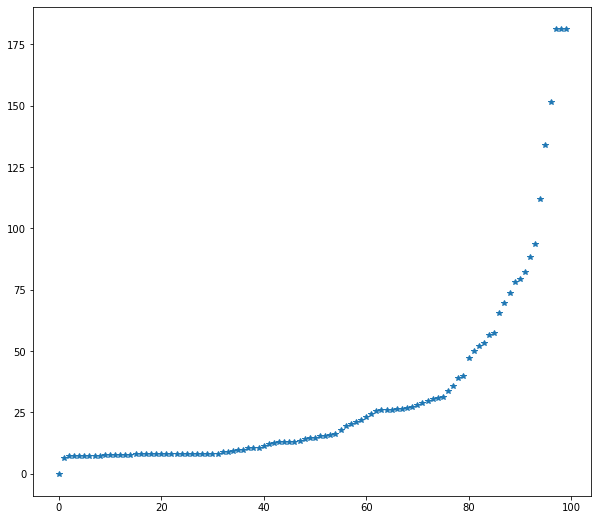

In [42]:
p=[ ]
for i in range(1,101):
    xyz = (titanic['Fare'].quantile(i/100))
    p.append(xyz)
q=pd.Series(p)

pd.set_option("max_rows", None)
print(q)

plt.figure(figsize=(10,9))
plt.plot(p,'*')

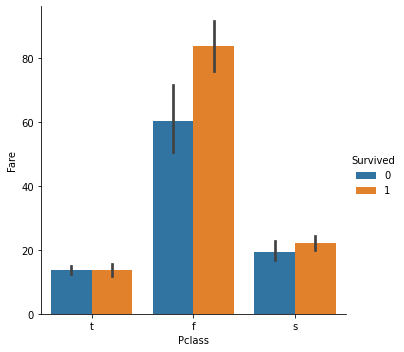

In [43]:
sns.catplot(x='Pclass', y='Fare', hue='Survived' ,data= titanic, kind='bar')

In [44]:
cat_data = titanic.select_dtypes('O')
cat_data.head()

,Pclass,Sex,Embarked
0,t,male,S
1,f,female,C
2,t,female,S
3,f,female,S
4,t,male,S


In [45]:
titanic.drop(cat_data.columns, axis = 1, inplace= True)

In [46]:
cat_data=pd.get_dummies(cat_data, drop_first=True)

In [47]:
cat_data

,Pclass_s,Pclass_t,Sex_male,Embarked_Q,Embarked_S
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1
5,0,1,1,1,0
6,0,0,1,0,1
7,0,1,1,0,1
8,0,1,0,0,1
9,1,0,0,0,0


In [48]:
titanic=pd.concat([titanic,cat_data], axis=1)

In [49]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_s,Pclass_t,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


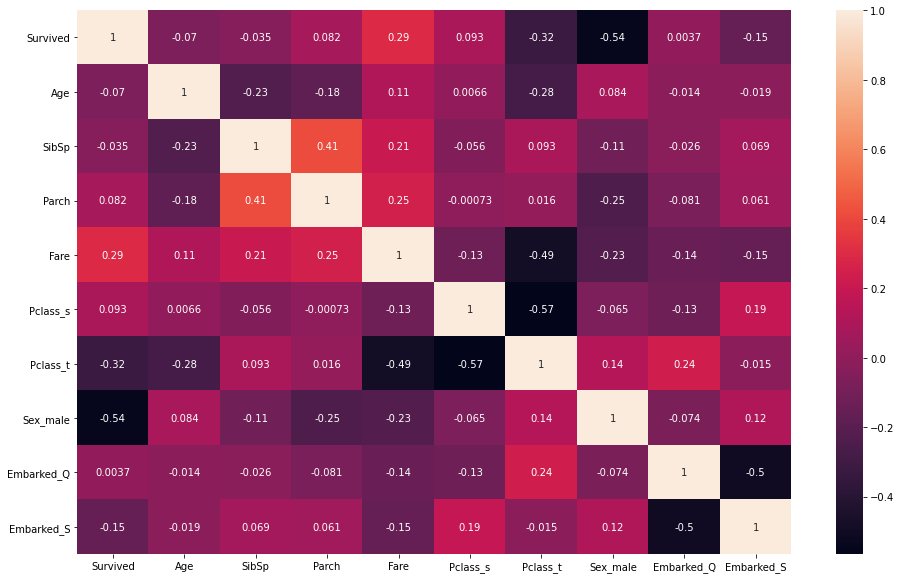

In [50]:
plt.figure(figsize = (16,10))
sns.heatmap(titanic.corr(),annot = True)

# smot

In [51]:
#pip install U-imbalanced sklearn

In [52]:
#from imblearn.over_sampling import SMOTE
#smt = SMOTE(random_state = 37) 
#x_train_res, y_train_res = smt.fit_sample(x_train, y_train.ravel())

In [53]:
# Deviding Dataset into x and y
y = titanic.iloc[:, 0]
x = titanic.iloc[:,1:10]

In [54]:
# Train Test Splitting
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (623, 9)
x_test  (268, 9)
y_train  (623,)
y_test  (268,)


In [56]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
##probability of test data
pred_prob=model.predict_proba(x_test)[:,1]
pred_prob

array([0.16089987, 0.27306257, 0.12618105, 0.89605748, 0.73914861,
       0.87243693, 0.64798958, 0.09162015, 0.73106089, 0.85573217,
       0.24942244, 0.06803712, 0.34763267, 0.19086584, 0.24879295,
       0.87548192, 0.223127  , 0.64810772, 0.29964851, 0.24524248,
       0.11413695, 0.28481722, 0.52429096, 0.12712148, 0.10264869,
       0.08902479, 0.42461004, 0.27632012, 0.10387651, 0.50626766,
       0.1293304 , 0.56966355, 0.50217094, 0.51501999, 0.13268441,
       0.17064913, 0.33371484, 0.64798958, 0.90685279, 0.09873789,
       0.30552313, 0.07825643, 0.09882767, 0.15929632, 0.61084595,
       0.12849809, 0.12952384, 0.11794708, 0.11357884, 0.43676618,
       0.74685216, 0.73311995, 0.0667049 , 0.51945775, 0.0648923 ,
       0.89639222, 0.26745104, 0.93647595, 0.77719633, 0.71412309,
       0.12297109, 0.86607541, 0.77065263, 0.30951242, 0.15929632,
       0.63523401, 0.42982416, 0.10051001, 0.20707727, 0.84417865,
       0.78074592, 0.95537399, 0.52731995, 0.8901878 , 0.11701

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [59]:
print(accuracy_score(y_test,pred))

0.8097014925373134


In [60]:
print(confusion_matrix(y_test,pred))

[[136  21]
 [ 30  81]]


In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [62]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[136  21]
 [ 30  81]]


In [63]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [64]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))

0.8097014925373134
0.8097014925373134


In [65]:
TPR=TP/(TP+FN)
print(TPR)

0.7297297297297297


In [66]:
FPR=TP/(TP+FP)
print(FPR)

0.7941176470588235


In [67]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.7297297297297297


In [68]:

# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))

0.7297297297297297


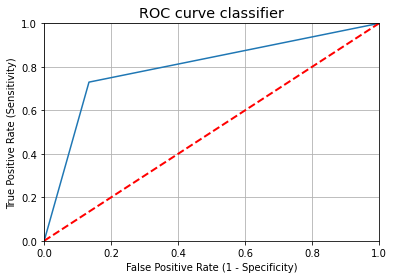

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))

0.7979858839731452


In [71]:
f1 = metrics.f1_score(y_test, pred)
print(f1)

0.7605633802816901


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

      feature       VIF
0         Age  5.010924
1       SibSp  1.679271
2       Parch  1.759531
3        Fare  2.431744
4    Pclass_s  2.050959
5    Pclass_t  4.265970
6    Sex_male  3.147989
7  Embarked_Q  1.614398
8  Embarked_S  5.181602


In [73]:
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
glm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
glm_1.params

const         1.088876
Age          -0.004861
SibSp        -0.035346
Parch        -0.019231
Fare          0.000740
Pclass_s     -0.054794
Pclass_t     -0.264966
Sex_male     -0.492638
Embarked_Q   -0.029202
Embarked_S   -0.110612
dtype: float64

In [74]:
print(glm_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     41.43
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           8.39e-58
Time:                        09:11:29   Log-Likelihood:                -282.61
No. Observations:                 623   AIC:                             585.2
Df Residuals:                     613   BIC:                             629.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0889      0.085     12.815      0.0

In [75]:
titanic.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_s', 'Pclass_t',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [76]:
x1=titanic[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_s', 'Pclass_t', 'Sex_male', 'Embarked_Q']]
y1=titanic[['Survived']]

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x1, y1, test_size=0.3, random_state=42)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (623, 8)
x_test  (268, 8)
y_train  (623, 1)
y_test  (268, 1)


In [78]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [80]:
print(accuracy_score(y_test,pred))

0.8097014925373134


In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [82]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[139  18]
 [ 33  78]]


In [83]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [84]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))

0.8097014925373134
0.8097014925373134


In [85]:
TPR=TP/(TP+FN)
print(TPR)

0.7027027027027027


In [86]:
FPR=TP/(TP+FP)
print(FPR)

0.8125


In [87]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.7027027027027027


In [88]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))

0.7027027027027027


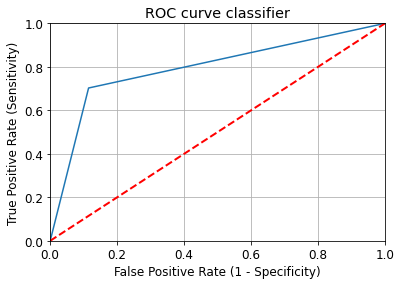

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))

0.7940265105870201


In [91]:
f1 = metrics.f1_score(y_test, pred)
print(f1)

0.7536231884057971


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

      feature       VIF
0         Age  4.485437
1       SibSp  1.669458
2       Parch  1.754369
3        Fare  2.376598
4    Pclass_s  1.684655
5    Pclass_t  3.354835
6    Sex_male  3.081934
7  Embarked_Q  1.197369


In [93]:
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
glm_2 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
glm_2.params

const         1.025742
Age          -0.005177
SibSp        -0.038856
Parch        -0.022481
Fare          0.000873
Pclass_s     -0.076424
Pclass_t     -0.281239
Sex_male     -0.498515
Embarked_Q    0.062839
dtype: float64

In [94]:
print(glm_2.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     45.35
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           3.22e-57
Time:                        09:12:12   Log-Likelihood:                -286.02
No. Observations:                 623   AIC:                             590.0
Df Residuals:                     614   BIC:                             629.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0257      0.082     12.541      0.0

In [95]:
x2=titanic[['Age','Pclass_t', 'SibSp', 'Fare', 'Sex_male', 'Embarked_Q']]
y2=titanic[['Survived']]

In [96]:
x_train, x_test, y_train, y_test = train_test_split( x2, y2, test_size=0.3, random_state=42)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (623, 6)
x_test  (268, 6)
y_train  (623, 1)
y_test  (268, 1)


In [97]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)
pred



array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [99]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))



0.8097014925373134
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [100]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[138  19]
 [ 32  79]]


In [101]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]




In [102]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))



0.8097014925373134
0.8097014925373134


In [103]:
TPR=TP/(TP+FN)
print(TPR)
FPR=TP/(TP+FP)
print(FPR)


0.7117117117117117
0.8061224489795918


In [104]:

sensitivity = TP / float(FN + TP)
print(sensitivity)



0.7117117117117117


In [105]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))

0.7117117117117117


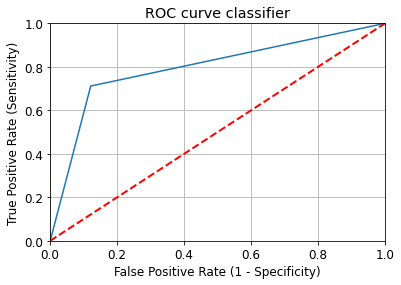

In [106]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)




In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))



0.7953463017157284


In [108]:
f1 = metrics.f1_score(y_test, pred)
print(f1)

0.7559808612440191


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

      feature       VIF
0         Age  3.686527
1    Pclass_t  2.367970
2       SibSp  1.412972
3        Fare  2.015727
4    Sex_male  2.789570
5  Embarked_Q  1.177313


In [110]:
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
glm_3 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
glm_3.params

const         0.942690
Age          -0.004722
Pclass_t     -0.227346
SibSp        -0.047328
Fare          0.001288
Sex_male     -0.488899
Embarked_Q    0.070359
dtype: float64

In [111]:
print(glm_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     59.87
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           2.31e-58
Time:                        09:12:18   Log-Likelihood:                -287.52
No. Observations:                 623   AIC:                             589.0
Df Residuals:                     616   BIC:                             620.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9427      0.058     16.389      0.0

In [112]:
x3=titanic[['Age','Pclass_t', 'SibSp',  'Sex_male', 'Embarked_Q']]
y3=titanic[['Survived']]

In [113]:
x_train, x_test, y_train, y_test = train_test_split( x3, y3, test_size=0.3, random_state=42)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)



x_train  (623, 5)
x_test  (268, 5)
y_train  (623, 1)
y_test  (268, 1)


In [114]:

from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)
pred



array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [116]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))


0.8134328358208955
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [117]:

from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[141  16]
 [ 34  77]]


In [118]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]




In [119]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))



0.8134328358208955
0.8134328358208955


In [120]:
TPR=TP/(TP+FN)
print(TPR)
FPR=TP/(TP+FP)
print(FPR)


0.6936936936936937
0.8279569892473119


In [121]:

sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6936936936936937


In [122]:

# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))

0.6936936936936937


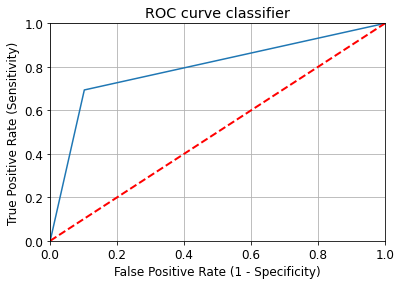

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)




In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))



0.795891432834108


In [125]:
f1 = metrics.f1_score(y_test, pred)
print(f1)

0.7549019607843137


In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

      feature       VIF
0         Age  2.571114
1    Pclass_t  2.162709
2       SibSp  1.186936
3    Sex_male  2.785849
4  Embarked_Q  1.176445


In [127]:
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
glm_4 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
glm_4.params

const         1.003903
Age          -0.004524
Pclass_t     -0.270724
SibSp        -0.037142
Sex_male     -0.504013
Embarked_Q    0.064421
dtype: float64

In [128]:
print(glm_4.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     70.07
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           5.08e-58
Time:                        09:12:26   Log-Likelihood:                -290.56
No. Observations:                 623   AIC:                             593.1
Df Residuals:                     617   BIC:                             619.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0039      0.052     19.288      0.0

In [129]:
x4=titanic[['Age','Pclass_t', 'SibSp',  'Sex_male',]]
y4=titanic[['Survived']]

In [130]:
x_train, x_test, y_train, y_test = train_test_split( x4, y4, test_size=0.3, random_state=42)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)




x_train  (623, 4)
x_test  (268, 4)
y_train  (623, 1)
y_test  (268, 1)


In [131]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [132]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)
pred



array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [133]:
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))



0.8134328358208955
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [134]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[141  16]
 [ 34  77]]


In [135]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]




In [136]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))


0.8134328358208955
0.8134328358208955


In [137]:

TPR=TP/(TP+FN)
print(TPR)
FPR=TP/(TP+FP)
print(FPR)



0.6936936936936937
0.8279569892473119


In [138]:
sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6936936936936937


In [139]:

# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))

0.6936936936936937


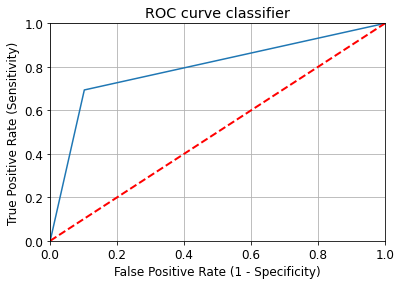

In [140]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)




In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.795891432834108


In [142]:

f1 = metrics.f1_score(y_test, pred)
print(f1)

0.7549019607843137


In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

    feature       VIF
0       Age  2.549488
1  Pclass_t  1.973857
2     SibSp  1.185820
3  Sex_male  2.759228


In [144]:
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
glm_5 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
glm_5.params

const       1.005461
Age        -0.004473
Pclass_t   -0.260986
SibSp      -0.037700
Sex_male   -0.507864
dtype: float64

In [145]:
print(glm_5.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     87.22
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           9.66e-59
Time:                        09:12:33   Log-Likelihood:                -291.21
No. Observations:                 623   AIC:                             592.4
Df Residuals:                     618   BIC:                             614.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0055      0.052     19.320      0.0